## MultiLayer Perceptron/ Feed Forward Architecture
### Building a Pokemon Classifer

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


## Data Preparation

In [2]:
import numpy as np
import os 
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [43]:
p = Path("./Dataset/")

dirs = p.glob("*")

labels_dict = {"Pikachu":0,"Bulbasaur":1,"Meowth":2}

image_data = []
labels = []

for folder_dir in dirs:
    #print(folder_name)
    label = str(folder_dir).split("\\")[-1]
    
    
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(100,100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        

In [62]:
print(len(image_data))
print(len(labels))

443
443


In [45]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape,labels.shape)

(443, 100, 100, 3) (443,)


In [46]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

#Unzip
image_data[:],labels[:] = zip(*combined)

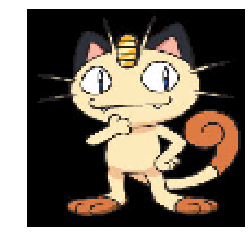

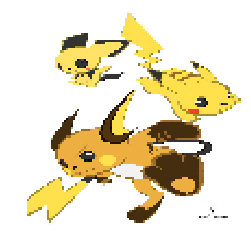

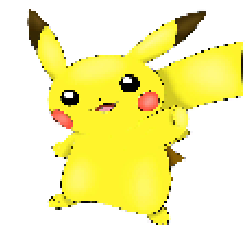

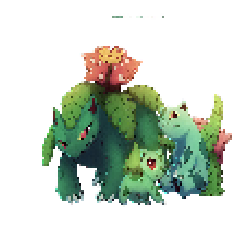

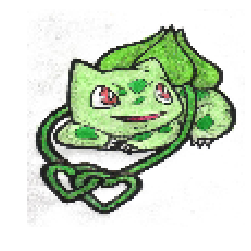

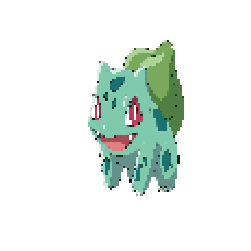

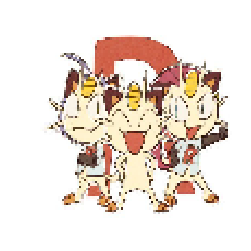

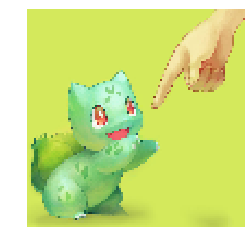

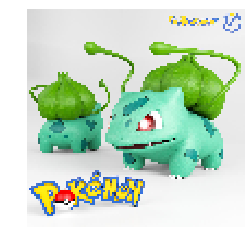

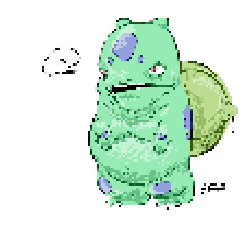

In [47]:
from matplotlib import pyplot as plt

def drawImg(img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()    
    return 

for i in range(10):
    drawImg(image_data[i])

In [107]:
M = image_data.shape[0] 
X = image_data.reshape(M,-1)
Y = labels

print(X.shape)
print(Y.shape)

X  = X[:200,:]
Y = Y[:200]

(443, 30000)
(443,)


### Model Architecture

In [108]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [109]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta4 = y_ - y
        
        dw3 = np.dot(a2.T,delta4) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta4,axis=0)
        
        delta3 = (1-np.square(a2))*np.dot(delta4,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta3)  
        db2 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a1))*np.dot(delta3,W2.T) 
        dw1 = np.dot(X.T,delta2)
        db1 = np.sum(delta2,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)
        
       

In [110]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l    

def one_hot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m, depth))
    y_oht[np.arange(m), y] = 1
    return y_oht


In [111]:
model = NeuralNetwork(input_size=30000,layers=[100,40],output_size=3)

In [112]:
def train(X,Y,model,epochs,logs=True):
    """Creates and Model and Trains it!"""
    
    training_loss = []
    val_loss = []
    val_acc = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        model.backward(X,Y_OHT)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l),end='\n')
    #model.summary()
        

In [116]:
train(X,Y,model,500)

Epoch 0 Loss 0.1735
Epoch 50 Loss 0.2063
Epoch 100 Loss 0.1593
Epoch 150 Loss 0.1510
Epoch 200 Loss 0.1521
Epoch 250 Loss 0.1442
Epoch 300 Loss 0.1418
Epoch 350 Loss 0.1402
Epoch 400 Loss 0.1360
Epoch 450 Loss 0.1497


## Summary

In [117]:

model.summary()

W1  (30000, 100)
A1  (200, 100)
W2  (100, 40)
A2  (200, 40)
W3  (40, 3)
Y_  (200, 3)


In [118]:
outputs = model.predict(X)
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 79.5000



### END OF NOTEBOOK ###

In [124]:
random_pokemon  = np.random.randint(100)
print(random_pokemon)


24


In [125]:
id_pokemeon = {0:"pikachu",1:"bulbasaur","2":"mew"}
def drawPokemon(img):
    plt.imshow(img.reshape(100,100,3))
    plt.show()

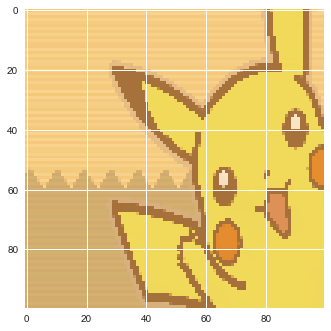

In [126]:
drawPokemon(image_data[random_pokemon])

In [133]:
predict = model.predict(X[random_pokemon])
print("Network Prediction -->",id_pokemeon[predict[0]])

Network Prediction --> pikachu


### Confusion Matrix

In [128]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[68  7  2]
 [22 68  8]
 [ 1  1 23]]


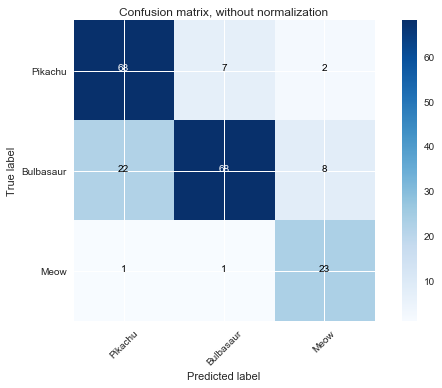

In [129]:
from sklearn.metrics import confusion_matrix
plt.style.use("seaborn")
cnf_matrix = confusion_matrix(outputs,Y)
plot_confusion_matrix(cnf_matrix, classes=["Pikachu","Bulbasaur","Meow"],
                      title='Confusion matrix, without normalization')

In [130]:
from sklearn.metrics import classification_report

In [132]:
print(classification_report(outputs,Y))

             precision    recall  f1-score   support

          0       0.75      0.88      0.81        77
          1       0.89      0.69      0.78        98
          2       0.70      0.92      0.79        25

avg / total       0.81      0.80      0.79       200

